<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Sarcasm_with_with_Conv1D_and_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional LSTM

In [0]:
import json
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-05-21 08:12:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c1a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-05-21 08:12:29 (129 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences= []
labels = []
urls = []

In [0]:
for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, 
                      oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_length, 
                               padding=padding_type, 
                               truncating=trunc_type)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [48]:
num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=1)

Epoch 1/50
625/625 [==============================] - 35s 56ms/step - loss: 0.4516 - accuracy: 0.7728 - val_loss: 0.3850 - val_accuracy: 0.8202
Epoch 2/50
625/625 [==============================] - 34s 55ms/step - loss: 0.3520 - accuracy: 0.8393 - val_loss: 0.3820 - val_accuracy: 0.8229
Epoch 3/50
625/625 [==============================] - 35s 56ms/step - loss: 0.3273 - accuracy: 0.8521 - val_loss: 0.3720 - val_accuracy: 0.8268
Epoch 4/50
625/625 [==============================] - 35s 57ms/step - loss: 0.3102 - accuracy: 0.8630 - val_loss: 0.3811 - val_accuracy: 0.8281
Epoch 5/50
625/625 [==============================] - 35s 57ms/step - loss: 0.3007 - accuracy: 0.8667 - val_loss: 0.3786 - val_accuracy: 0.8284
Epoch 6/50
625/625 [==============================] - 36s 57ms/step - loss: 0.2912 - accuracy: 0.8701 - val_loss: 0.3759 - val_accuracy: 0.8322
Epoch 7/50
625/625 [==============================] - 35s 57ms/step - loss: 0.2832 - accuracy: 0.8763 - val_loss: 0.3796 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

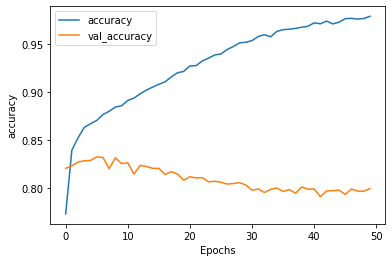

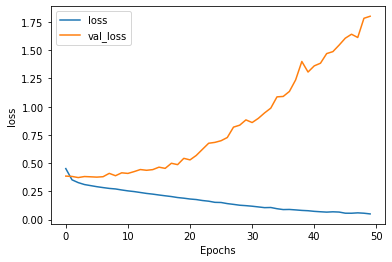

In [50]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
model.save("test.h5")

# Model with Conv1D

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-05-21 08:21:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-05-21 08:21:28 (108 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = np.array(tokenizer.texts_to_sequences(training_sentences))
training_padded = np.array(pad_sequences(training_sequences, 
                                maxlen=max_length, padding=padding_type, 
                                truncating=trunc_type))

testing_sequences = np.array(tokenizer.texts_to_sequences(testing_sentences))
testing_padded = np.array(pad_sequences(testing_sequences, maxlen=max_length, 
                                        padding=padding_type, 
                                        truncating=trunc_type))

In [32]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(), 
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 50 
history2 = model2.fit(training_padded,
                    training_labels,
                    epochs = num_epochs,
                    validation_data =(testing_padded, testing_labels),
                    verbose =1)

Epoch 1/50
625/625 [==============================] - 8s 12ms/step - loss: 0.4757 - accuracy: 0.7625 - val_loss: 0.4195 - val_accuracy: 0.8092
Epoch 2/50
625/625 [==============================] - 8s 12ms/step - loss: 0.3580 - accuracy: 0.8381 - val_loss: 0.4043 - val_accuracy: 0.8159
Epoch 3/50
625/625 [==============================] - 8s 12ms/step - loss: 0.3184 - accuracy: 0.8591 - val_loss: 0.4102 - val_accuracy: 0.8159
Epoch 4/50
625/625 [==============================] - 8s 12ms/step - loss: 0.2822 - accuracy: 0.8801 - val_loss: 0.4109 - val_accuracy: 0.8161
Epoch 5/50
625/625 [==============================] - 8s 12ms/step - loss: 0.2501 - accuracy: 0.8941 - val_loss: 0.4345 - val_accuracy: 0.8144
Epoch 6/50
625/625 [==============================] - 8s 12ms/step - loss: 0.2123 - accuracy: 0.9150 - val_loss: 0.4743 - val_accuracy: 0.8059
Epoch 7/50
625/625 [==============================] - 8s 12ms/step - loss: 0.1815 - accuracy: 0.9307 - val_loss: 0.5133 - val_accuracy: 0.8131

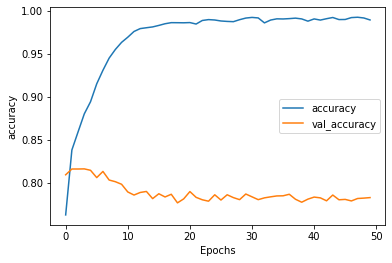

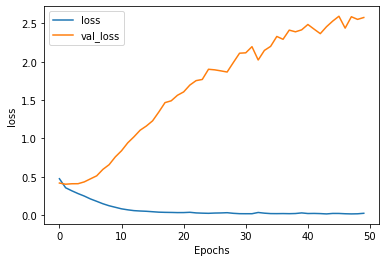

In [36]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

In [0]:
model.save("test2.h5")